# SYDE 532 Assignment 4 Problem 8.10

## Sujeethan Vigneswaran s9vignes@uwaterloo.ca

In [1]:
import numpy as np
import random

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.animation as animation

In [2]:
# Enable Interactive Notebook
%matplotlib notebook

## 1. Start with a 200 by 200 grid of ash as the state Z0 at iteration 0.

### At each point in time, each cell can be one of three states: { tree, burning, ash }.

### ash = 0, tree = 1, burning = 2

## 2. Create the Cellular Automata Rules

Given the state map Zn, then at iteration n + 1 ... 

• Any tree in Zn next to burning in Zn is burning in Zn+1

• Any burning in Zn becomes ash in Zn+1

• Each ash in Zn becomes tree at random with probability p

• Each tree in Zn becomes burning at random with probability f 

p is a measure of forest growth rate, and f is a measure of the likelihood of lightning strikes.

In [3]:
# Helper Functions

def isBurning(a):
    if a == 2:
        return True
    else:
        return False
    
def isTree(a):
    if a == 1:
        return True
    else:
        return False
    
def isAsh(a):
    if a == 0:
        return True
    else:
        return False

In [4]:
def automata(state, f, p):
    """ Apply Cellular Automata Rules to State
    Input: State at time n  
    
    Return: State at time n+1    
    """
    
    new_state = state
    
    # Iterate through all locations
    for i_index, i in enumerate(state):
        for j_index, j in enumerate(i):
            if isBurning(j):
                # Burning Becomes Ash
                new_state[i_index, j_index] = 0
                
                # Neighbour Burns
                try:
                    # Burn Up Neighbour
                    if isTree(state[i_index-1, j_index]):
                        new_state[i_index-1, j_index] = 2
                except:
                    continue
                    
                try:
                    # Burn Down Neighbour
                    if isTree(state[i_index+1, j_index]):
                        new_state[i_index+1, j_index] = 2
                except:
                    continue
                    
                try:
                    # Burn Left Neighbour
                    if isTree(state[i_index, j_index-1]):
                        new_state[i_index, j_index-1] = 2
                except:
                    continue
                    
                try:
                    # Burn Right Neighbour
                    if isTree(state[i_index, j_index+1]):
                        new_state[i_index, j_index+1] = 2
                except:
                    continue
                    
            if isAsh(j):
                # Random Ash to Tree
                if random.random() <= p:
                    new_state[i_index, j_index] = 1
                    
            if isTree(j):
                # Random Tree Burning
                if random.random() <= f:
                    new_state[i_index, j_index] = 2

    return new_state

## Part 1. f = 0.0001 & p = 0.01

f/p ratio is:  0.01 



<IPython.core.display.Javascript object>


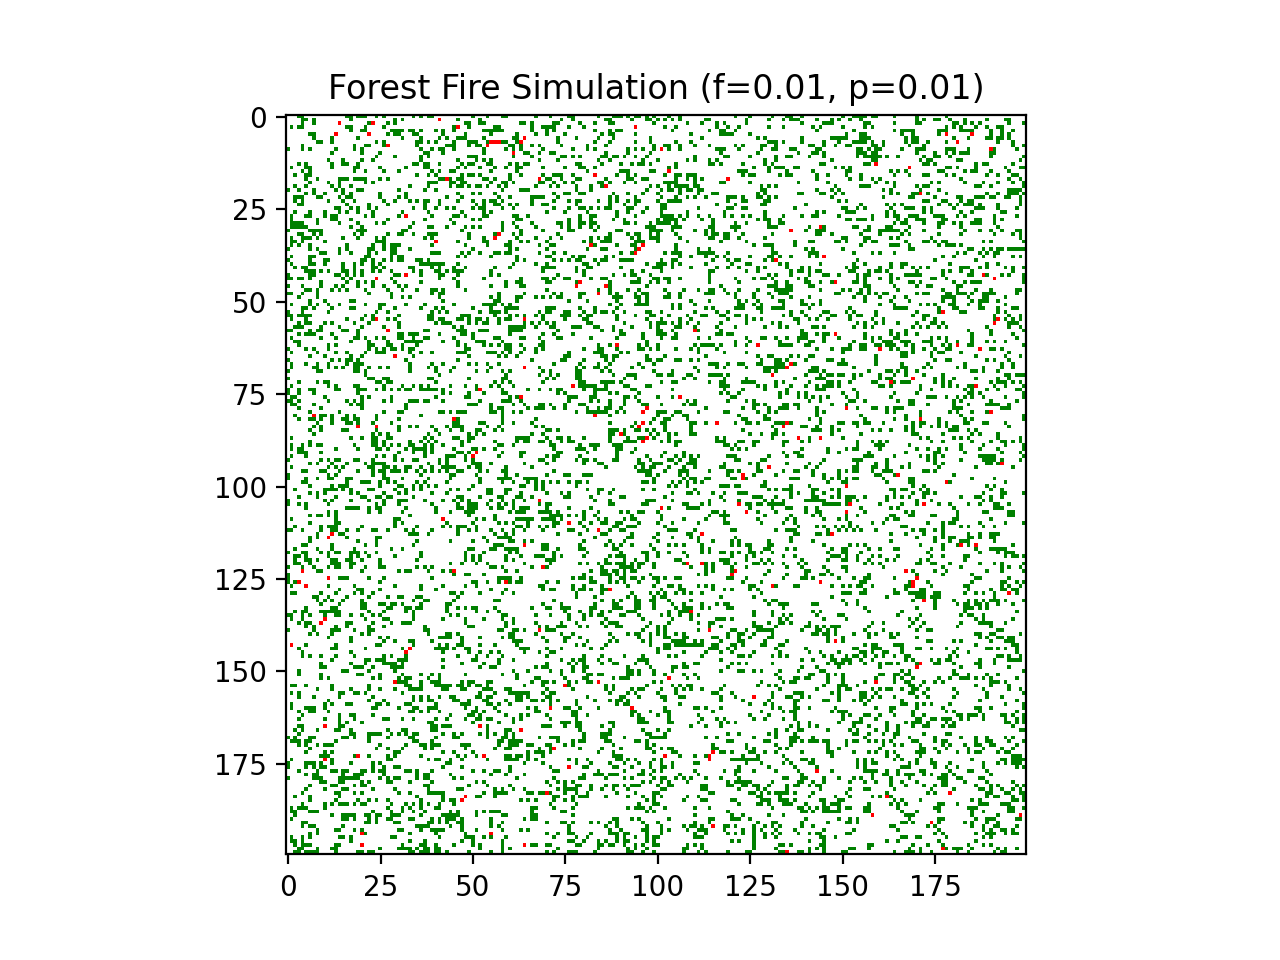

In [6]:
p = 0.01
f = 0.0001
print("f/p ratio is: ", f/p, "\n")

max_iterations = 500

# Init State
state1 = np.zeros((200, 200))

# Pretty Colours     
cmap = mpl.colors.ListedColormap(['white', 'green', 'red'])
boundary = [1, 1, 2, 3]
norm = mpl.colors.BoundaryNorm(boundary, cmap.N)

def animate1(i):
    global state1, f, p, cmap, norm
    plt.title("Forest Fire Simulation (f=0.0001, p=0.01)")
    plt.imshow(state1, interpolation='none', cmap=cmap, norm=norm)
    state = automata(state1, f, p)

ani1 = animation.FuncAnimation(plt.gcf(), animate1, interval=1, frames=max_iterations, repeat=False)

# writervideo = animation.FFMpegWriter(fps=24)
# ani1.save("part1_video.mp4", writer=writervideo)

plt.show()

## Part 2. f = 0.001 & p = 0.01

f/p ratio is:  0.1 



<IPython.core.display.Javascript object>


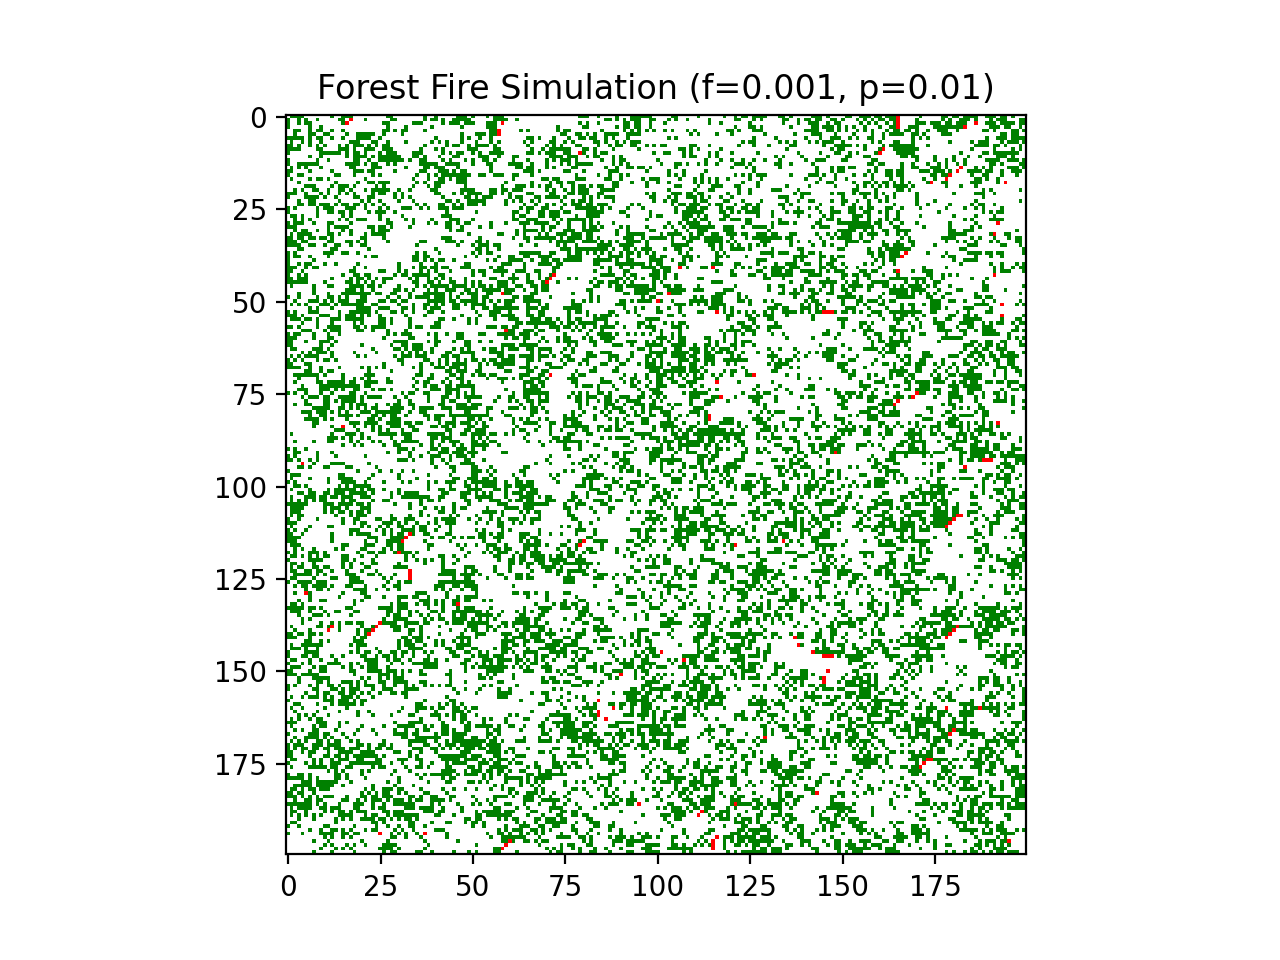

In [9]:
p = 0.01
f = 0.001
print("f/p ratio is: ", f/p, "\n")

max_iterations = 500

# Init State
state2 = np.zeros((200, 200))

# Pretty Colours     
cmap = mpl.colors.ListedColormap(['white', 'green', 'red'])
boundary = [1, 1, 2, 3]
norm = mpl.colors.BoundaryNorm(boundary, cmap.N)

def animate2(i):
    global state2, f, p, cmap, norm
    plt.title("Forest Fire Simulation (f=0.001, p=0.01)")
    plt.imshow(state2, interpolation='none', cmap=cmap, norm=norm)
    state = automata(state2, f, p)

ani2 = animation.FuncAnimation(plt.gcf(), animate2, interval=1, frames=max_iterations, repeat=False)

# writervideo2 = animation.FFMpegWriter(fps=24)
# ani2.save("part2_video.mp4", writer=writervideo2)

plt.show()

## Part 3. f = 0.01 & p = 0.01

f/p ratio is:  1.0 



<IPython.core.display.Javascript object>


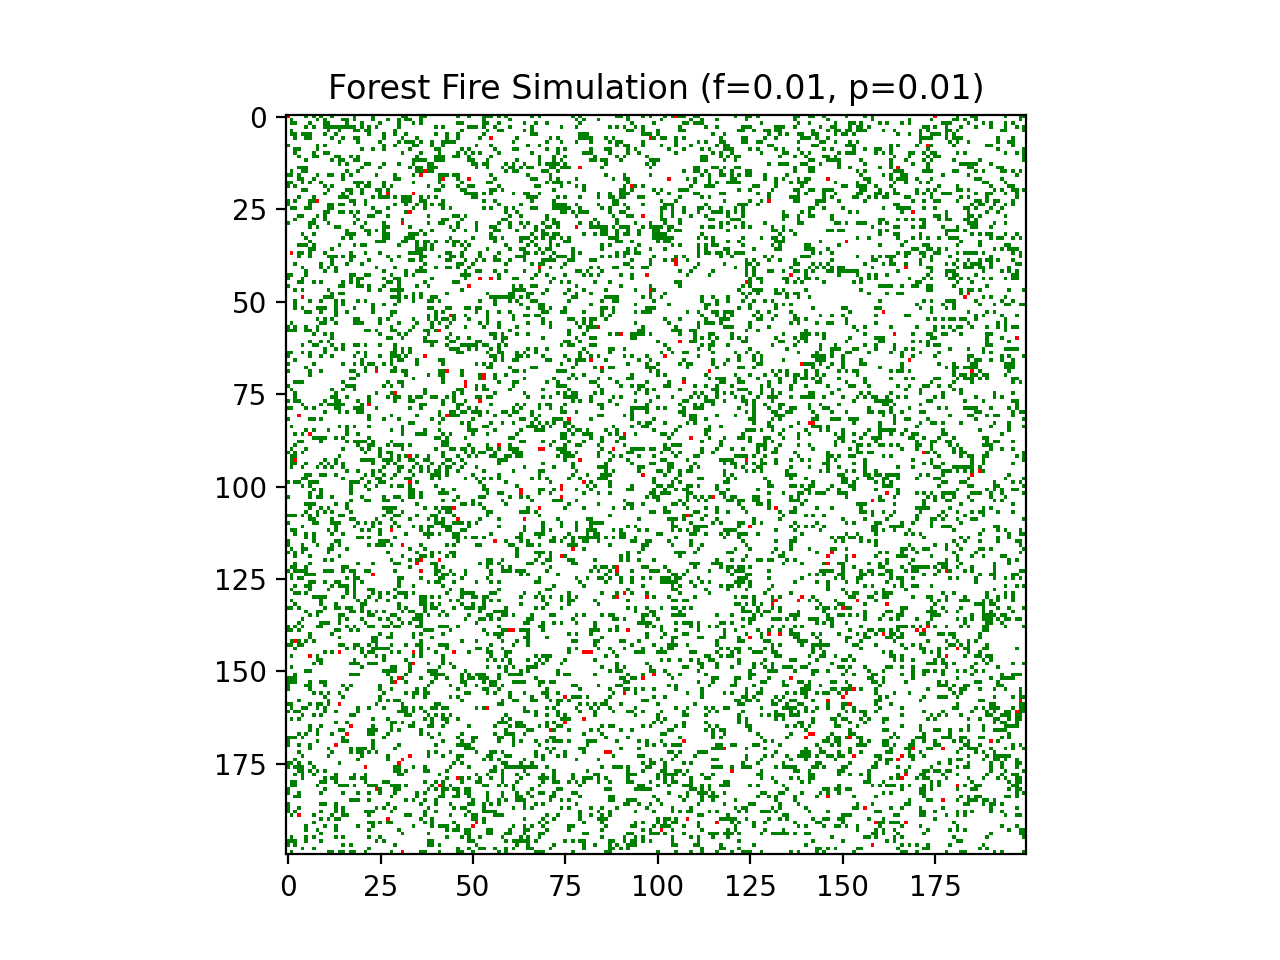

In [10]:
p = 0.01
f = 0.01
print("f/p ratio is: ", f/p, "\n")

max_iterations = 500

# Init State
state3 = np.zeros((200, 200))

# Pretty Colours     
cmap = mpl.colors.ListedColormap(['white', 'green', 'red'])
boundary = [1, 1, 2, 3]
norm = mpl.colors.BoundaryNorm(boundary, cmap.N)

def animate3(i):
    global state3, f, p, cmap, norm
    plt.title("Forest Fire Simulation (f=0.01, p=0.01)")
    plt.imshow(state3, interpolation='none', cmap=cmap, norm=norm)
    state = automata(state3, f, p)

ani3 = animation.FuncAnimation(plt.gcf(), animate3, interval=1, frames=max_iterations, repeat=False)

# writervideo3 = animation.FFMpegWriter(fps=24)
# ani3.save("part3_video.mp4", writer=writervideo3)

plt.show()